In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.naive_bayes import GaussianNB

In [0]:
df = pd.read_csv('Casos-coronavirus-colombia.csv')

In [0]:
X = df
y = df['Atencion']

In [8]:
X

,Unnamed: 0,Id,Ciudad_ubicacion,Departamento,Atencion,Edad,Sexo,Tipo,Pais_procedencia
0,24,25,0,0,0,49,0,0,0
1,27,28,1,1,0,22,0,0,1
2,32,33,2,2,0,59,0,0,0
3,44,45,3,3,0,29,0,0,0
4,53,54,2,2,0,42,1,0,0
...,...,...,...,...,...,...,...,...,...
2501,2771,2772,2,2,0,55,1,2,3
2502,2772,2773,2,2,1,65,0,2,3
2503,2773,2774,2,2,3,74,0,2,3
2504,2774,2775,2,2,0,56,0,1,3


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
print(f'Numero en entrenamiento : {len(X_train)}')
print(f'Numero en prueba : {len(y_test)}')



Numero en entrenamiento : 2004
Numero en prueba : 502


In [0]:
clf = GaussianNB()

In [12]:
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
matriz = pd.crosstab(y_test, y_pred, rownames=['Atencion'], colnames=['Predicted'], margins=True)

matriz 

Predicted,0,1,2,3,All
Atencion,,,,,
0,376,0,0,0,376
1,0,24,0,0,24
2,0,0,24,0,24
3,0,0,0,78,78
All,376,24,24,78,502


## Graficando la matriz 

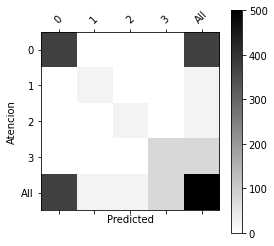

In [15]:
def plot_confusion_matrix(matriz , title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(matriz , cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(matriz .columns))
    plt.xticks(tick_marks, matriz .columns, rotation=45)
    plt.yticks(tick_marks, matriz .index)
    #plt.tight_layout()
    plt.ylabel(matriz .index.name)
    plt.xlabel(matriz .columns.name)

plot_confusion_matrix(matriz )

In [16]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='micro')
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
1.0


In [0]:
Y_train=X_train["Atencion"]

In [0]:
submission=pd.DataFrame()
submission["Id"]=X_train["Id"]

In [22]:
"""Make a Csv with Results"""
pred = pd.DataFrame(clf.predict(X_test),columns=["clasificacion"])
submission=submission.join(pred,how="inner")
submission.to_csv("prediccion.csv", index=False)
submission.head(10)

,Id,clasificacion
453,694,0
404,643,2
469,712,2
419,658,0
341,575,0
488,731,0
173,378,0
16,95,0
283,508,0
254,477,0


In [23]:
pred['clasificacion'].value_counts()

0    376
3     78
2     24
1     24
Name: clasificacion, dtype: int64